# Problem Setting
We are given a linked list with `head` as the first node.  Let's number the nodes in the list: node_1, node_2, node_3, ... etc.

Each node may have a next larger value: for `node_i`, `next_larger(node_i)` is the `node_j.val` such that `j > i`, `node_j.val > node_i.val`, and `j` is the smallest possible choice.  If such a `j` does not exist, the next larger value is 0.

Return an array of integers `answer`, where `answer[i] = next_larger(node_{i+1})`.

Note that in the example **inputs** (not outputs) below, arrays such as [2,1,5] represent the serialization of a linked list with a head node value of 2, second node value of 1, and third node value of 5.

 

| Variable        | Type | Description           | 
| :------------- |:-------------:| :--- |
| head  | linked list |  the first linked list object |
| answer | list of int| an array of integers where `answer[i] = next_larger(node_{i+1}`) |



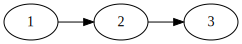

In [101]:
from graphviz import Digraph
# Create Digraph object
dot = Digraph()
dot.attr(rankdir='LR', size='8,5')
dot.node('1')
dot.node('2')
dot.node('3')
dot.edges(['12', '23'])
dot

<!-- TEASER_END -->

## Utility Function

In [81]:
# Definition for singly-linked list.
class ListNode:
    def __init__(self, x):
        self.val = x
        self.next = None

def list_to_list_node(l):
    head = None
    pointer = None
    for n in l:
        if head is not None:
            pointer.next = ListNode(n)
            pointer = pointer.next
        else:
            head = ListNode(n)
            pointer = head
    return head

In [84]:
# Create Linked ListNode from a given list of integers
head = list_to_list_node(l=[2, 1, 5, 10])

while head: 
    print(head.val)
    head = head.next

2
1
5
10


In [85]:
def visualize_ListNode(head):
    dot = Digraph()
    dot.attr(rankdir='LR')

    while head:
        dot.node(str(head), label=str(head.val))
        if head.next is not None:
            dot.edge(str(head), str(head.next))
            
        head = head.next
    return dot
    

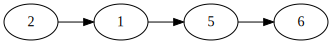

In [86]:
head = list_to_list_node(l=[2, 1, 5, 6])
visualize_ListNode(head)

## Example 1
Input: [2,1,5]

Output: [5,5,0]

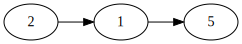

In [74]:
head = list_to_list_node(l=[2, 1, 5])
visualize_ListNode(head)

## Example 2

Input: [2,7,4,3,5]

Output: [7,0,5,5,0]

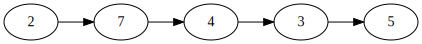

In [75]:
head = list_to_list_node(l=[2,7,4,3,5])
visualize_ListNode(head)

### Example 3
Input: [1,7,5,1,9,2,5,1]
    
Output: [7,9,9,9,0,5,0,0]

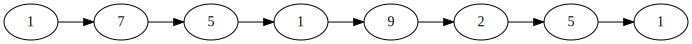

In [88]:
head = list_to_list_node(l=[1,7,5,1,9,2,5,1])
visualize_ListNode(head)

# Solution from [Zecong Hu](https://leetcode.com/huzecong/)

In [12]:
# Definition for singly-linked list.
class ListNode:
    def __init__(self, x):
        self.val = x
        self.next = None

class Solution:
    def nextLargerNodes(self, head: ListNode):
        vals = []
        while head is not None:
            vals.append(head.val)
            head = head.next
        ans = [0] * len(vals)
        pos = []
        for idx in range(len(vals) - 1, -1, -1):
            while len(pos) > 0 and vals[pos[-1]] <= vals[idx]:
                pos.pop(-1)
            if len(pos) == 0:
                ans[idx] = 0
            else:
                ans[idx] = vals[pos[-1]]
            pos.append(idx)
        return ans

## Step-by-step

### Extract values from LinkedList

In [92]:
head = list_to_list_node(l=[1,7,5,1,9,2,5,1])

In [93]:
# The first 4 lines to obtain the list of values in Linked ListNode
vals = []
while head is not None:
    vals.append(head.val)
    head = head.next

In [94]:
vals

[1, 7, 5, 1, 9, 2, 5, 1]

### Initialization

In [95]:
ans = [0] * len(vals)
pos = []

### Main loop in a reverse order 

In [96]:
for idx in range(len(vals) - 1, -1, -1):
    print(idx)
#     while len(pos) > 0 and vals[pos[-1]] <= vals[idx]:
#         pos.pop(-1)
#     if len(pos) == 0:
#         ans[idx] = 0
#     else:
#         ans[idx] = vals[pos[-1]]
#     pos.append(idx)

7
6
5
4
3
2
1
0


In each loop, there are three things occurred: 
* check the value at `i`th is bigger than the latest candidate of next large value
    * if yes, replace the last candidate with `i`th value  
* if no candidate that is larger than 'i'th value, i.e., `i`th value is the maximum across values after `i`th
    * otherwise, the index of the latest candidate will be stored in `answer`

In [100]:
### For each loop, look for the next largest values while storing candidates in `pos`
for idx in range(len(vals) - 1, -1, -1):
    print(idx)
    while len(pos) > 0 and vals[pos[-1]] <= vals[idx]:
        print('remove the latest candidate: {}'.format(pos[-1]))
        pos.pop(-1)
    if len(pos) == 0:
        print('No next larger value found so 0 is the answer')
        ans[idx] = 0
    else:
        print('The next larger value is {}'.format(vals[pos[-1]]))
        ans[idx] = vals[pos[-1]]
    pos.append(idx)
    


7
remove the latest candidate: 0
The next larger value is 7
6
remove the latest candidate: 7
The next larger value is 7
5
The next larger value is 5
4
remove the latest candidate: 5
remove the latest candidate: 6
remove the latest candidate: 1
remove the latest candidate: 4
No next larger value found so 0 is the answer
3
The next larger value is 9
2
remove the latest candidate: 3
The next larger value is 9
1
remove the latest candidate: 2
The next larger value is 9
0
The next larger value is 7
